In [1]:
!pip install --upgrade scikit-learn


In [2]:
#importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
%timeit np.random.normal(size=100)

4.45 μs ± 435 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
#importing the dataset
df=pd.read_csv(r"C:\Users\CHARLES\Desktop\New folder\car_evaluation.csv",header=None)

In [6]:
#Exploratory data analysis
#viewing the dimensions of the dataset 
df.shape

(1728, 7)

In [7]:
#previewing the top five dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
#Renaming the columns 
New_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = New_columns

New_columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
df.columns


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [10]:
#previewing the dataset 
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
#summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
#frequency distribution of values in variables
for col in df.columns:
    print('Column name :' ,df[col].value_counts())

Column name : buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Column name : maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Column name : doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Column name : persons
2       576
4       576
more    576
Name: count, dtype: int64
Column name : lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
Column name : safety
low     576
med     576
high    576
Name: count, dtype: int64
Column name : class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


# summary of variables 
- There  are 7 variables in the dataset. All the variables are of categorical data types
- These are given by ```buying```,```maint```,```doors```,```persons```,```lug_boot```,```safety``` and ```class```
- ```class``` is the target variable.

In [13]:
#exproling class variable
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
#cheaking for missing values in the dataset
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
#declaring features vector and target variable 
X=df.drop(columns=('class'))
y=df['class']

In [16]:
#spliting data into train and tesing data 
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
#checking the shape of the X_train and X_test
X_train.shape,X_test.shape

((1157, 6), (571, 6))

### we will do feature engineering to the dataset we will transform the raw data into useful features that helps us understand the model better and increse its predictive power.


In [19]:
# import category encoders
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Create a dictionary to store a LabelEncoder for each column
label_encoders = {}

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Use transform only to avoid mismatch
    label_encoders[col] = le  # Store the encoder in case you need to inverse transform later


In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,1,0
1201,2,1,0,1,1,2
628,0,0,3,0,0,2
1498,1,0,3,1,1,2
1263,2,1,2,2,1,1


## Random Forest Classifier Model with default parameters

In [23]:
#importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [30]:
# instantiate the classifier
rfc=RandomForestClassifier(random_state=0,n_estimators=100)
# fit the model
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
#predicting the test set resuits
y_pred=rfc.predict(X_test)

In [32]:
#cheaking accuracy score 
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9544658493870403

In [33]:
model = RandomForestClassifier()
print(model.n_estimators)

100


In [35]:
#finding the importance features in the model 
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

    feature  importance
5    safety    0.265392
3   persons    0.222230
0    buying    0.201751
1     maint    0.154568
4  lug_boot    0.089286
2     doors    0.066773


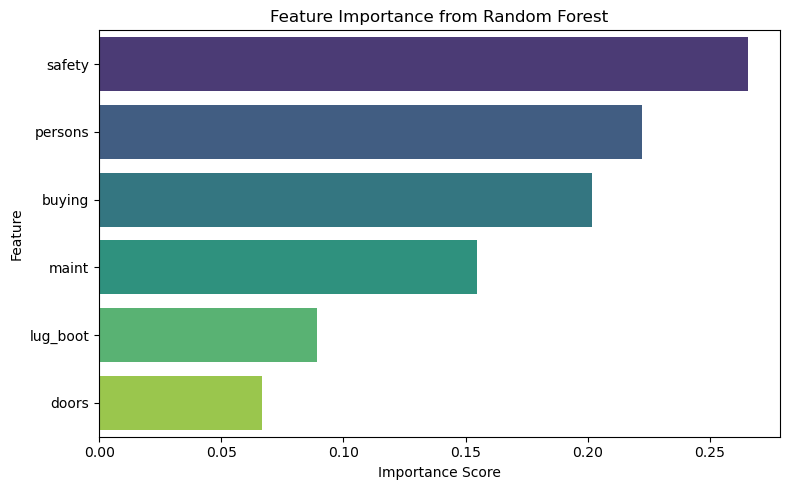

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm.A confusion matrix will give us a clear picture of classification model performance and the types of error produced by the model. it gives us a summary of correct and incorrect predictions broken dowm by each category.

Four types of outcomes are possible while evaluating a classification model performnce. These are 

     - True Positive (TP) - True Positive occurs when we predict an observation belongs to a certain class and the  observation actually belongs to that class.
     - True Negative(TN) - True Negative occur when we predict an obsevation does not belong to a certain class and the observation actually does not belong to that class.
     - False Positives(FP) - False Positive occur when we predict an obsevation belongs to a certain class and the observation actually does not belong to that class.```Type 1 error```
     - False Negative (FN) - False Negative occur when we predict an observation does not belong to a certain class but the obsevation  actually belongs to that class.  ```Type 2 error```

In [37]:
# printing the confusinon matrix 
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
cm=confusion_matrix(y_test,y_pred)

In [39]:
cm

array([[113,   7,   8,   1],
       [  1,  18,   0,   1],
       [  5,   0, 392,   0],
       [  3,   0,   0,  22]], dtype=int64)

In [40]:
#classification report 
report=classification_report(y_test,y_pred)

In [41]:
report

'              precision    recall  f1-score   support\n\n         acc       0.93      0.88      0.90       129\n        good       0.72      0.90      0.80        20\n       unacc       0.98      0.99      0.98       397\n       vgood       0.92      0.88      0.90        25\n\n    accuracy                           0.95       571\n   macro avg       0.89      0.91      0.90       571\nweighted avg       0.96      0.95      0.95       571\n'